In [44]:
#import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [45]:

#change time string to minites
def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

In [46]:
time16 = pd.read_csv('marathon_results_2016.csv')
df = time16

In [47]:


df['5K_mins'] = df['5K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K_mins'] - df['5K_mins'] 
df['15K_mins'] = df['15K'].apply(lambda x: time_to_min(x))
df['15K_mins'] = df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Half_mins'] = df['Half'].apply(lambda x: time_to_min(x))
df['Half_mins'] = df['Half_mins'] - df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['20K_mins'] = df['20K'].apply(lambda x: time_to_min(x))
df['20K_mins'] = df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['25K_mins'] = df['25K'].apply(lambda x: time_to_min(x))
df['25K_mins'] = df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['30K_mins'] = df['30K'].apply(lambda x: time_to_min(x))
df['30K_mins'] = df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['35K_mins'] = df['35K'].apply(lambda x: time_to_min(x))
df['35K_mins'] = df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Final_mins'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['Final_mins'] = df['Final_mins'] - df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Pace'] = df['Pace'].apply(lambda x: time_to_min(x))
df['5K_pace'] = df['5K_mins']*0.322
df['10K_pace'] = df['10K_mins']*0.322
df['15K_pace'] = df['15K_mins']*0.322
df['20K_pace'] = df['20K_mins']*0.322
df['Half_pace'] = df['Half_mins']*0.264
df['25K_pace'] = df['25K_mins']*0.322
df['30K_pace'] = df['30K_mins']*0.322
df['35K_pace'] = df['35K_mins']*0.322
df['Final_pace'] = df['Final_mins']*0.224


In [56]:
#clean data 
time16.dropna(subset=['M/F'], inplace=True)
notblank16 = time16["M/F"].notnull() #clean M/F data
male16 = (time16["M/F"] == "M")
filter_male16 = time16[male16 & notblank16] #data for male
female16 = (time16["M/F"] == "F")
filter_female16 = time16[female16 & notblank16] #data for female
columns = ['5K_pace','10K_pace','15K_pace','Half_pace','25K_pace','30K_pace','35K_pace','Final_pace']
female16 = filter_female16[:100]
avg_f16 = female16[columns].mean()
male16 = filter_male16[:100]
avg_m16 = male16[columns].mean()
avg_all16 = time16[columns].mean()

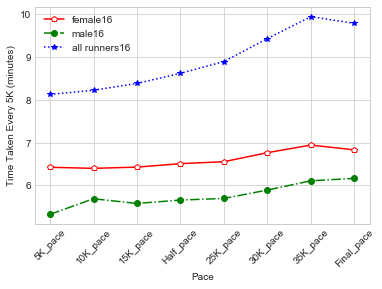

In [66]:
plt.figure() # setup figure
x = range(len(columns))
plt.plot(x, avg_f16[columns],'rp-', mfc='w',label = 'female16')
plt.plot(x, avg_m16[columns], 'go-.',label = 'male16')
plt.plot(x, avg_all16[columns], 'b*:', label = 'all runners16')
plt.xticks(x, columns, rotation=45)
plt.xlabel('Pace') # apply labels
plt.ylabel('Time Taken Every 5K (minutes)')
plt.legend(loc='best')
plt.show() # show figure
# plt.savefig('pace changes.jpg', dpi = 500)
